# Project Shark Attack

### Camila Prada Borges DAPT55PT - agosto 2021



In [2]:
cd /Users/camilaprada/Documents/IronHack DAPT55/55_DAPT-master/Projetos/Shark attacks

/Users/camilaprada/Documents/IronHack DAPT55/55_DAPT-master/Projetos/Shark attacks


In [3]:
ls

attacks.csv  pie.html     shark.png


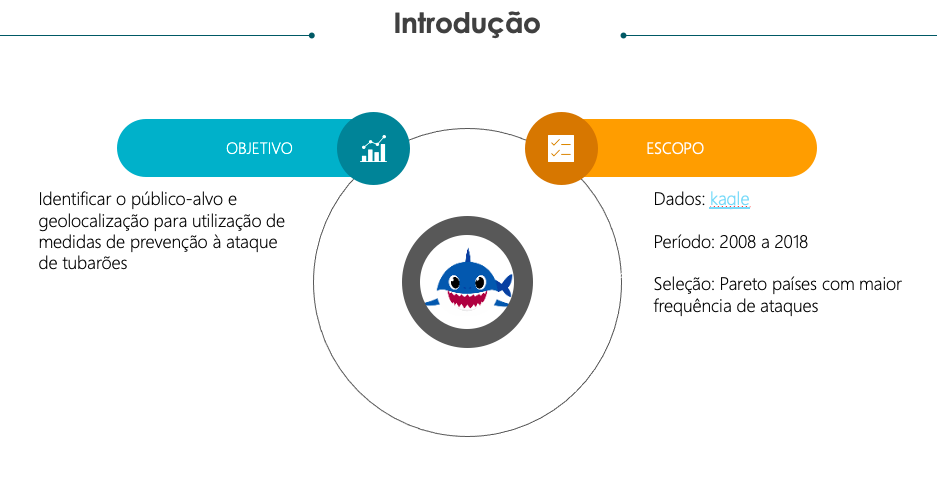

In [4]:
from IPython.display import display
from PIL import Image
path='shark.png'
display(Image.open(path))

In [4]:
import pandas as pd

In [5]:
import numpy as np

### 1) Dataset reading 

In [8]:
df = pd.read_csv('attacks.csv', encoding='ISO-8859-1')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [10]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [11]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [12]:
df.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

In [13]:
df.dtypes.value_counts()

object     22
float64     2
dtype: int64

In [14]:
df.shape

(25723, 24)

### 2) Escolhendo colunas e montando o novo df

In [15]:

df_clean = df[['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'sex', 'age', 'injury', 'fatal_(y/n)']]

In [16]:
df_clean.head()

,case_number,date,year,type,country,area,location,activity,sex,age,injury,fatal_(y/n)
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N


In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case_number  8702 non-null   object 
 1   date         6302 non-null   object 
 2   year         6300 non-null   float64
 3   type         6298 non-null   object 
 4   country      6252 non-null   object 
 5   area         5847 non-null   object 
 6   location     5762 non-null   object 
 7   activity     5758 non-null   object 
 8   sex          5737 non-null   object 
 9   age          3471 non-null   object 
 10  injury       6274 non-null   object 
 11  fatal_(y/n)  5763 non-null   object 
dtypes: float64(1), object(11)
memory usage: 2.4+ MB


### 3) Data exploration

In [18]:
df_clean.isna().sum()

case_number    17021
date           19421
year           19423
type           19425
country        19471
area           19876
location       19961
activity       19965
sex            19986
age            22252
injury         19449
fatal_(y/n)    19960
dtype: int64

In [19]:
df_clean[df_clean['age'].isna()]

,case_number,date,year,type,country,area,location,activity,sex,age,injury,fatal_(y/n)
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,M,NaN,"No injury, board bitten",N
15,2018.05.12,12-May-2018,2018.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Beach, East London",Surfing,M,NaN,"Minor injury, marks on board",N
16,2018.05.09,09-May-2018,2018.0,Questionable,AUSTRALIA,New South Wales,"Sharpes Beach, Ballina",Surfing,M,NaN,"No injury, surfboard damaged",N
...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_clean[df_clean['case_number'].isna()]

,case_number,date,year,type,country,area,location,activity,sex,age,injury,fatal_(y/n)
5488,NaN,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,M,NaN,Lacerations to leg from hooked shark PROVOKED ...,N
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_clean.dtypes

#mudar year para integer
# date para data
# age para integer


case_number     object
date            object
year           float64
type            object
country         object
area            object
location        object
activity        object
sex             object
age             object
injury          object
fatal_(y/n)     object
dtype: object

In [25]:
df_clean['country'].value_counts()

USA                       2229
AUSTRALIA                 1338
SOUTH AFRICA               579
PAPUA NEW GUINEA           134
NEW ZEALAND                128
                          ... 
MALDIVE ISLANDS              1
NICARAGUA                    1
NORTH SEA                    1
RED SEA / INDIAN OCEAN       1
CEYLON (SRI LANKA)           1
Name: country, Length: 212, dtype: int64

In [27]:
df_clean['type'].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: type, dtype: int64

In [30]:
df_clean['activity'].value_counts()

Surfing                                   971
Swimming                                  869
Fishing                                   431
Spearfishing                              333
Bathing                                   162
                                         ... 
Playing with a frisbee in the shallows      1
Sinking of the ferryboat Dumaguete          1
Wreck of the Storm King                     1
Feeding mullet to sharks                    1
Wreck of  large double sailing canoe        1
Name: activity, Length: 1532, dtype: int64

In [31]:
df_clean['sex'].value_counts()

M      5094
F       637
M         2
N         2
lli       1
.         1
Name: sex, dtype: int64

In [34]:
df_clean['fatal_(y/n)'].value_counts()

N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: fatal_(y/n), dtype: int64

### 4) Data Cleaning

In [35]:
((df_clean.isnull().sum(axis=0))/len(df_clean)).sort_values(ascending=False)

age            0.865062
sex            0.776970
activity       0.776154
location       0.775998
fatal_(y/n)    0.775959
area           0.772694
country        0.756949
injury         0.756094
type           0.755161
year           0.755083
date           0.755005
case_number    0.661704
dtype: float64

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
sns.set({'figure.figsize': (10,5)})

<AxesSubplot:>

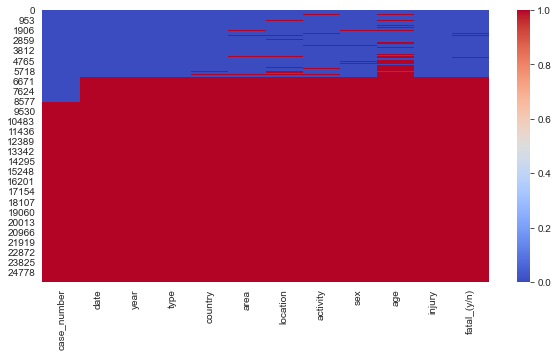

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_clean.isnull(), cbar=True, cmap='coolwarm')

In [39]:
df_clean.loc[6671,:]

case_number      0
date           NaN
year           NaN
type           NaN
country        NaN
area           NaN
location       NaN
activity       NaN
sex            NaN
age            NaN
injury         NaN
fatal_(y/n)    NaN
Name: 6671, dtype: object

In [40]:
df_clean.dropna(axis=0, how='all', inplace=False)

,case_number,date,year,type,country,area,location,activity,sex,age,injury,fatal_(y/n)
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_clean.dropna(axis=0, how='all', inplace=True)

/usr/local/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8703 entries, 0 to 25722
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case_number  8702 non-null   object 
 1   date         6302 non-null   object 
 2   year         6300 non-null   float64
 3   type         6298 non-null   object 
 4   country      6252 non-null   object 
 5   area         5847 non-null   object 
 6   location     5762 non-null   object 
 7   activity     5758 non-null   object 
 8   sex          5737 non-null   object 
 9   age          3471 non-null   object 
 10  injury       6274 non-null   object 
 11  fatal_(y/n)  5763 non-null   object 
dtypes: float64(1), object(11)
memory usage: 883.9+ KB


In [43]:
#deletando apenas a row index 25722

df_clean.drop([25722])

,case_number,date,year,type,country,area,location,activity,sex,age,injury,fatal_(y/n)
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...,...,...,...,...,...,...,...,...,...
8697,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
sns.set({'figure.figsize': (10,5)})

<AxesSubplot:>

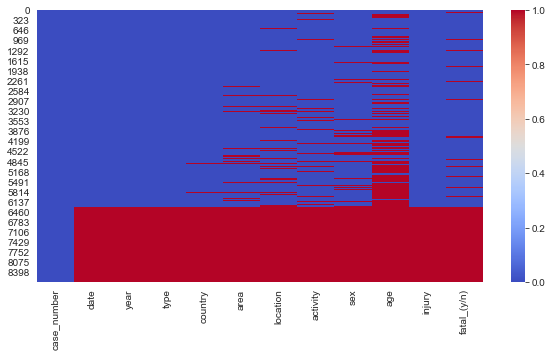

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_clean.isnull(), cbar=True, cmap='coolwarm')

In [46]:
df_clean.loc[6302,:]

case_number      0
date           NaN
year           NaN
type           NaN
country        NaN
area           NaN
location       NaN
activity       NaN
sex            NaN
age            NaN
injury         NaN
fatal_(y/n)    NaN
Name: 6302, dtype: object

In [47]:
df_clean.drop(index=df.index[6302:8701], axis=0, inplace=True, errors='ignore')

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 0 to 25722
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case_number  6303 non-null   object 
 1   date         6302 non-null   object 
 2   year         6300 non-null   float64
 3   type         6298 non-null   object 
 4   country      6252 non-null   object 
 5   area         5847 non-null   object 
 6   location     5762 non-null   object 
 7   activity     5758 non-null   object 
 8   sex          5737 non-null   object 
 9   age          3471 non-null   object 
 10  injury       6274 non-null   object 
 11  fatal_(y/n)  5763 non-null   object 
dtypes: float64(1), object(11)
memory usage: 640.2+ KB


In [49]:
sns.set({'figure.figsize': (10,5)})

<AxesSubplot:>

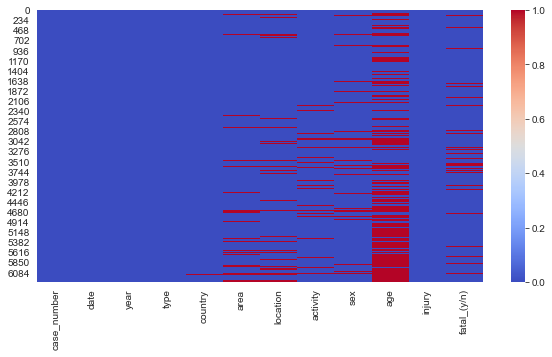

In [50]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_clean.isnull(), cbar=True, cmap='coolwarm')

In [52]:
((df_clean.isnull().sum(axis=0))/len(df_clean)).sort_values(ascending=False)

age            0.449397
sex            0.089943
activity       0.086612
location       0.085977
fatal_(y/n)    0.085819
area           0.072494
country        0.008249
injury         0.004759
type           0.000952
year           0.000635
date           0.000317
case_number    0.000159
dtype: float64

In [54]:
df_clean['year'] = df_clean.year.convert_dtypes(convert_integer=True)

/var/folders/_y/zq95zg6j097f8p7bn78chggw0000gp/T/ipykernel_8427/2091378001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['year'] = df_clean.year.convert_dtypes(convert_integer=True)


In [56]:
df_clean.dtypes

case_number    object
date           object
year            Int64
type           object
country        object
area           object
location       object
activity       object
sex            object
age            object
injury         object
fatal_(y/n)    object
dtype: object

In [57]:
df_clean.date=pd.to_datetime(df_clean.date, errors='coerce')
df_clean.head(3)

/usr/local/lib/python3.9/site-packages/pandas/core/generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,case_number,date,year,type,country,area,location,activity,sex,age,injury,fatal_(y/n)
0,2018.06.25,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,2018.06.18,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N
2,2018.06.09,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N


In [58]:
df_clean.dtypes

case_number            object
date           datetime64[ns]
year                    Int64
type                   object
country                object
area                   object
location               object
activity               object
sex                    object
age                    object
injury                 object
fatal_(y/n)            object
dtype: object

In [59]:
df_clean['date']

0       2018-06-25
1       2018-06-18
2       2018-06-09
3       2018-06-08
4       2018-06-04
           ...    
6299           NaT
6300           NaT
6301           NaT
8701           NaT
25722          NaT
Name: date, Length: 6304, dtype: datetime64[ns]

In [60]:
df_clean['date'].value_counts()

1957-01-01    11
1942-01-01    10
1941-01-01     8
1956-01-01     8
1950-01-01     7
              ..
1997-10-04     1
1997-09-16     1
1997-09-09     1
1997-09-08     1
1703-03-26     1
Name: date, Length: 4605, dtype: int64

In [61]:
((df_clean.isnull().sum(axis=0))/len(df_clean)).sort_values(ascending=False)

age            0.449397
date           0.134201
sex            0.089943
activity       0.086612
location       0.085977
fatal_(y/n)    0.085819
area           0.072494
country        0.008249
injury         0.004759
type           0.000952
year           0.000635
case_number    0.000159
dtype: float64

In [63]:
sns.set({'figure.figsize': (10,5)})

<AxesSubplot:>

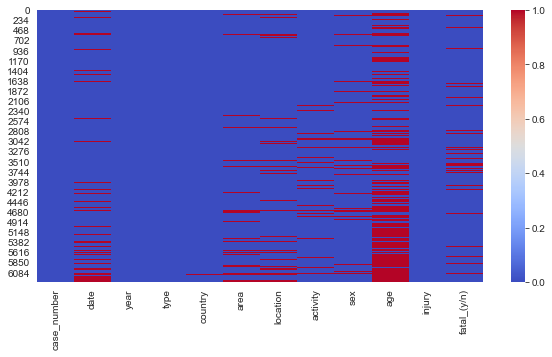

In [64]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_clean.isnull(), cbar=True, cmap='coolwarm')

In [65]:
df_clean['date'].isnull().sum()

846

In [66]:
df_clean['date'].notnull().sum()

5458

In [67]:
mask = (df_clean['date'].isnull())
rows_to_drop = mask[mask==True].index

In [68]:
df_clean.drop(rows_to_drop, axis=0, inplace=True, errors='ignore')

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [69]:
df_clean['date'].isnull().sum()

0

In [70]:
sns.set({'figure.figsize': (10,5)})

<AxesSubplot:>

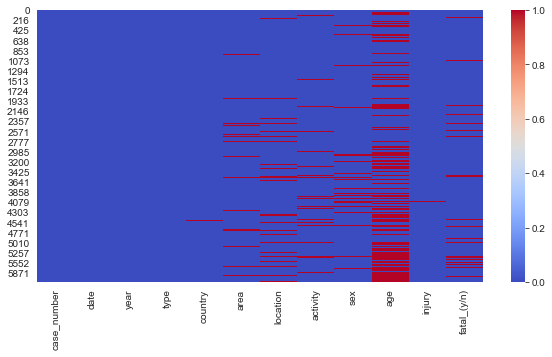

In [71]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_clean.isnull(), cbar=True, cmap='coolwarm')

In [72]:
((df_clean.isnull().sum(axis=0))/len(df_clean)).sort_values(ascending=False)

age            0.390802
sex            0.084097
fatal_(y/n)    0.082265
activity       0.075302
location       0.064126
area           0.053133
country        0.004947
injury         0.003664
type           0.000366
case_number    0.000000
date           0.000000
year           0.000000
dtype: float64

In [73]:
df_clean.dtypes

case_number            object
date           datetime64[ns]
year                    Int64
type                   object
country                object
area                   object
location               object
activity               object
sex                    object
age                    object
injury                 object
fatal_(y/n)            object
dtype: object

In [74]:
import datetime as dt

In [75]:
#df['month_year'] = pd.to_datetime(df['birth_date']).dt.to_period('M')
#df.head()

In [76]:
df_clean['new_year'] = pd.to_datetime(df_clean['date']).dt.year
df_clean.head()

/var/folders/_y/zq95zg6j097f8p7bn78chggw0000gp/T/ipykernel_8427/222715595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['new_year'] = pd.to_datetime(df_clean['date']).dt.year


,case_number,date,year,type,country,area,location,activity,sex,age,injury,fatal_(y/n),new_year
0,2018.06.25,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,2018
1,2018.06.18,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,2018
2,2018.06.09,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,2018
3,2018.06.08,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,2018
4,2018.06.04,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,2018


In [77]:
df_clean = df_clean.drop(columns='year')
df_clean.head()

,case_number,date,type,country,area,location,activity,sex,age,injury,fatal_(y/n),new_year
0,2018.06.25,2018-06-25,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,2018
1,2018.06.18,2018-06-18,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,2018
2,2018.06.09,2018-06-09,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,2018
3,2018.06.08,2018-06-08,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,2018
4,2018.06.04,2018-06-04,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,2018


In [78]:
sns.set({'figure.figsize': (10,5)})

<AxesSubplot:>

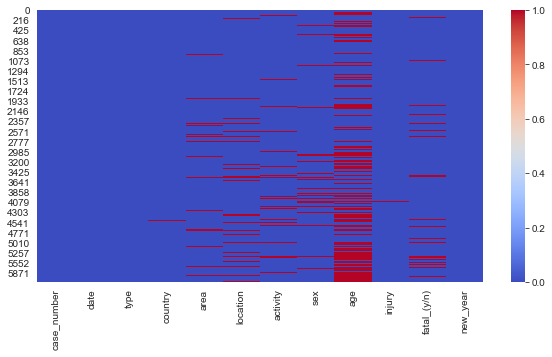

In [79]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_clean.isnull(), cbar=True, cmap='coolwarm')

In [80]:
((df_clean.isnull().sum(axis=0))/len(df_clean)).sort_values(ascending=False)

age            0.390802
sex            0.084097
fatal_(y/n)    0.082265
activity       0.075302
location       0.064126
area           0.053133
country        0.004947
injury         0.003664
type           0.000366
case_number    0.000000
date           0.000000
new_year       0.000000
dtype: float64

In [143]:
df_clean['new_year'].value_counts().head(10)

2015    142
2017    126
2016    125
2014    118
2013    116
2011    115
2012    113
2008    111
2009    110
2007    104
Name: new_year, dtype: int64

In [82]:
filtered = df_clean[(df_clean['new_year']>=2008) & (df_clean['age'].isnull()==False)]                              

In [144]:
filtered.head()

,case_number,date,type,country,area,location,activity,sex,age,injury,fatal_(y/n),new_year
0,2018.06.25,2018-06-25,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,2018
1,2018.06.18,2018-06-18,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,2018
2,2018.06.09,2018-06-09,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,2018
6,2018.06.03.a,2018-06-03,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,FATAL,Y,2018
7,2018.05.27,2018-05-27,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N,2018


In [84]:
((filtered.isnull().sum(axis=0))/len(df_clean)).sort_values(ascending=False)

fatal_(y/n)    0.010810
location       0.005497
activity       0.005497
area           0.004947
type           0.000183
sex            0.000183
case_number    0.000000
date           0.000000
country        0.000000
age            0.000000
injury         0.000000
new_year       0.000000
dtype: float64

<AxesSubplot:>

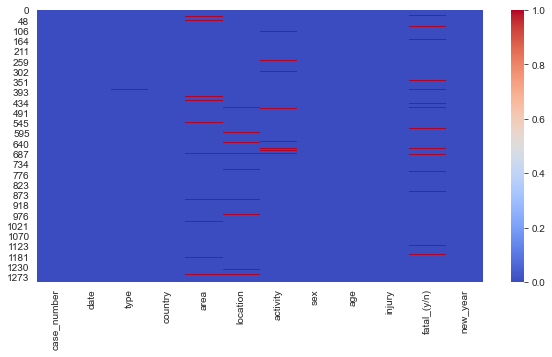

In [85]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(filtered.isnull(), cbar=True, cmap='coolwarm')

In [86]:
filtered.drop_duplicates()

,case_number,date,type,country,area,location,activity,sex,age,injury,fatal_(y/n),new_year
0,2018.06.25,2018-06-25,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,2018
1,2018.06.18,2018-06-18,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,2018
2,2018.06.09,2018-06-09,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,2018
6,2018.06.03.a,2018-06-03,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,FATAL,Y,2018
7,2018.05.27,2018-05-27,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,2008.02.15,2008-02-15,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,M,25,Lacerations to foot,N,2008
1290,2008.02.07,2008-02-07,Unprovoked,AUSTRALIA,New South Wales,Horseshoe Bay,Surfing,F,14,Abrasions to elbow; collided with shark,N,2008
1293,2008.01.29,2008-01-29,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,"Suncoast Pirates Beach, Durban",Surf-skiing,M,42,"No injury to surf-skiier, shark holed ski",N,2008
1294,2008.01.27,2008-01-27,Provoked,AUSTRALIA,Queensland,200 km east of Coolangatta,Accidentally stood on hooked shark's tail befo...,M,20,Laceration to left knee PROVOKED INCIDENT,N,2008


In [87]:
filtered.dropna(axis=0)

,case_number,date,type,country,area,location,activity,sex,age,injury,fatal_(y/n),new_year
0,2018.06.25,2018-06-25,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,2018
1,2018.06.18,2018-06-18,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,2018
2,2018.06.09,2018-06-09,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,2018
6,2018.06.03.a,2018-06-03,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,FATAL,Y,2018
7,2018.05.27,2018-05-27,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,2008.02.15,2008-02-15,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,M,25,Lacerations to foot,N,2008
1290,2008.02.07,2008-02-07,Unprovoked,AUSTRALIA,New South Wales,Horseshoe Bay,Surfing,F,14,Abrasions to elbow; collided with shark,N,2008
1293,2008.01.29,2008-01-29,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,"Suncoast Pirates Beach, Durban",Surf-skiing,M,42,"No injury to surf-skiier, shark holed ski",N,2008
1294,2008.01.27,2008-01-27,Provoked,AUSTRALIA,Queensland,200 km east of Coolangatta,Accidentally stood on hooked shark's tail befo...,M,20,Laceration to left knee PROVOKED INCIDENT,N,2008


In [88]:
((filtered.isnull().sum(axis=0))/len(df_clean)).sort_values(ascending=False)

fatal_(y/n)    0.010810
location       0.005497
activity       0.005497
area           0.004947
type           0.000183
sex            0.000183
case_number    0.000000
date           0.000000
country        0.000000
age            0.000000
injury         0.000000
new_year       0.000000
dtype: float64

In [89]:
filtered.columns

Index(['case_number', 'date', 'type', 'country', 'area', 'location',
       'activity', 'sex', 'age', 'injury', 'fatal_(y/n)', 'new_year'],
      dtype='object')

In [90]:
null_fatal = filtered[(filtered['fatal_(y/n)'].isnull()==True)]
null_fatal = null_fatal[['case_number', 'date', 'type', 'country', 'area', 'location',
       'activity', 'sex', 'age', 'injury', 'fatal_(y/n)', 'new_year']]
null_fatal

,case_number,date,type,country,area,location,activity,sex,age,injury,fatal_(y/n),new_year
27,2018.04.15.c,2018-04-15,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,M,34,"Multiple severe injuries to arms and leg, leg ...",NaN,2018
76,2017.10.01,2017-10-01,Invalid,SOUTH AFRICA,Western Cape Province,Dyer Island,Scuba Diving,M,31,FATAL,NaN,2017
79,2017.09.24.b,2017-09-24,Invalid,USA,New York,Rockaway,Surfing,M,33,"Lacerations to right ankle, foot & toe",NaN,2017
84,2017.09.15.b,2017-09-15,Invalid,SOUTH AFRICA,Western Cape Province,Hawston,Scuba Diving,M,25,"FATAL, but death was probably due to drowning",NaN,2017
98,2017.08.26.b,2017-08-26,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,F,11,Lacerations to left foot,NaN,2017
107,2017.07.29.c,2017-07-29,Invalid,USA,South Carolina,"Hilton Head Island, Beaufort County",Swimming,M,10,Abrasions and cuts to sole of foot,NaN,2017
115,2017.07.20.c,2017-07-20,Invalid,USA,South Carolina,"Hilton Head Island, Beaufort County",Swimming,F,8,Foot injured,NaN,2017
145,2017.05.03,2017-05-03,Invalid,USA,California,"Sunset Beach, Orange County",Surfing,F,18,"Laceration to thigh, likely caused by surfboar...",NaN,2017
159,2017.04.12.a,2017-04-12,Invalid,SOUTH AFRICA,KwaZulu-Natal,Protea Banks,Scuba Diving,M,68,"Fatal, coroner unable to determine if the dive...",NaN,2017
189,2017.01.03,2017-01-03,Invalid,AUSTRALIA,New South Wales,Merimbula,Wading,M,20,Minor injuries to foot & toes,NaN,2017


In [91]:
null_fatal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 27 to 1273
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   case_number  59 non-null     object        
 1   date         59 non-null     datetime64[ns]
 2   type         58 non-null     object        
 3   country      59 non-null     object        
 4   area         59 non-null     object        
 5   location     56 non-null     object        
 6   activity     51 non-null     object        
 7   sex          59 non-null     object        
 8   age          59 non-null     object        
 9   injury       59 non-null     object        
 10  fatal_(y/n)  0 non-null      object        
 11  new_year     59 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 6.0+ KB


In [92]:
#decisão limpar fatal usando como referencia dados da coluna injury

In [95]:
import sys
sys.executable

'/usr/local/opt/python@3.9/bin/python3.9'

In [97]:
from cleantext import clean

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [98]:
dfUSA = filtered[(filtered['country']=='USA')]
dfUSA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 1297
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   case_number  458 non-null    object        
 1   date         458 non-null    datetime64[ns]
 2   type         458 non-null    object        
 3   country      458 non-null    object        
 4   area         458 non-null    object        
 5   location     455 non-null    object        
 6   activity     439 non-null    object        
 7   sex          457 non-null    object        
 8   age          458 non-null    object        
 9   injury       458 non-null    object        
 10  fatal_(y/n)  431 non-null    object        
 11  new_year     458 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 46.5+ KB


In [99]:
dfUSA.head()

,case_number,date,type,country,area,location,activity,sex,age,injury,fatal_(y/n),new_year
0,2018.06.25,2018-06-25,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,2018
1,2018.06.18,2018-06-18,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,2018
2,2018.06.09,2018-06-09,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,2018
7,2018.05.27,2018-05-27,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N,2018
8,2018.05.26.b,2018-05-26,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,15,Lower left leg bitten,N,2018


In [102]:
(filtered['country'].value_counts()/len(filtered['country'])).cumsum()

USA             0.494067
AUSTRALIA       0.689320
SOUTH AFRICA    0.751888
BAHAMAS         0.776699
REUNION         0.800431
                  ...   
ISRAEL          0.995685
KIRIBATI        0.996764
MAURITIUS       0.997843
Fiji            0.998921
CROATIA         1.000000
Name: country, Length: 62, dtype: float64

In [103]:
country_ranking = filtered['country'].value_counts()
country_ranking.index

Index(['USA', 'AUSTRALIA', 'SOUTH AFRICA', 'BAHAMAS', 'REUNION', 'BRAZIL',
       'NEW CALEDONIA', 'MEXICO', 'SPAIN', 'FRENCH POLYNESIA', 'NEW ZEALAND',
       'EGYPT', 'VIETNAM', 'COSTA RICA', 'ECUADOR', 'PHILIPPINES', 'FIJI',
       'JAPAN', 'MOZAMBIQUE', 'TAIWAN', 'INDONESIA', 'SEYCHELLES', 'GUAM',
       'JAMAICA', 'SCOTLAND', 'RUSSIA', 'DOMINICAN REPUBLIC', 'TURKS & CAICOS',
       'ITALY', 'ST HELENA, British overseas territory', 'ENGLAND', 'THAILAND',
       'COLUMBIA', 'CUBA', 'MADAGASCAR', 'UNITED ARAB EMIRATES (UAE)', 'MALTA',
       'SAUDI ARABIA', 'SOLOMON ISLANDS', 'PANAMA', 'MALDIVES',
       'UNITED KINGDOM', 'PAPUA NEW GUINEA', 'KENYA', 'MALAYSIA',
       'SOUTH KOREA', 'ARUBA', 'PUERTO RICO', 'CANADA', 'TRINIDAD & TOBAGO',
       'UNITED ARAB EMIRATES', 'TONGA', 'CHINA', 'PALESTINIAN TERRITORIES',
       'CAPE VERDE', 'DIEGO GARCIA', 'FRANCE', 'ISRAEL', 'KIRIBATI',
       'MAURITIUS', 'Fiji', 'CROATIA'],
      dtype='object')

In [106]:
dftop5 = filtered[(filtered['country']=='USA')
                  | (filtered['country']=='AUSTRALIA')
                  | (filtered['country']=='SOUTH AFRICA')
                  | (filtered['country']=='BAHAMAS')
                  | (filtered['country']=='REUNION')]
dftop5

                  

,case_number,date,type,country,area,location,activity,sex,age,injury,fatal_(y/n),new_year
0,2018.06.25,2018-06-25,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,2018
1,2018.06.18,2018-06-18,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,2018
2,2018.06.09,2018-06-09,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,2018
7,2018.05.27,2018-05-27,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,N,2018
8,2018.05.26.b,2018-05-26,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,15,Lower left leg bitten,N,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,2008.02.15,2008-02-15,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,M,25,Lacerations to foot,N,2008
1290,2008.02.07,2008-02-07,Unprovoked,AUSTRALIA,New South Wales,Horseshoe Bay,Surfing,F,14,Abrasions to elbow; collided with shark,N,2008
1293,2008.01.29,2008-01-29,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,"Suncoast Pirates Beach, Durban",Surf-skiing,M,42,"No injury to surf-skiier, shark holed ski",N,2008
1294,2008.01.27,2008-01-27,Provoked,AUSTRALIA,Queensland,200 km east of Coolangatta,Accidentally stood on hooked shark's tail befo...,M,20,Laceration to left knee PROVOKED INCIDENT,N,2008


In [107]:
dftop5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 0 to 1297
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   case_number  742 non-null    object        
 1   date         742 non-null    datetime64[ns]
 2   type         741 non-null    object        
 3   country      742 non-null    object        
 4   area         732 non-null    object        
 5   location     728 non-null    object        
 6   activity     719 non-null    object        
 7   sex          741 non-null    object        
 8   age          742 non-null    object        
 9   injury       742 non-null    object        
 10  fatal_(y/n)  699 non-null    object        
 11  new_year     742 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 75.4+ KB


In [161]:
top5 = dftop5['country'].value_counts()
top5

USA             458
AUSTRALIA       181
SOUTH AFRICA     58
BAHAMAS          23
REUNION          22
Name: country, dtype: int64

In [115]:
pd.set_option('display.max_row', None)

In [117]:
dftop5['age']

0         57
1         11
2         48
7         52
8         15
9         12
10        32
11        10
12        10
14        34
21        60
24        33
25        29
28        41
29        37
33        12
34        19
35        25
36        10
37        69
38        18
39        38
40        55
41        34
42        35
46        14
47        18
50        28
53        54
54        35
56        25
60        25
61        14
63        25
66        31
69        17
70        60
71        15
74        54
75        40
76        31
79        33
83        28
84        25
87        18
89        35
95        17
96        37
97         3
100       69
102       13
104       34
106       15
107       10
108       12
114       40
115        8
116       40
117       50
121       46
123       13
126       16
128       14
129       34
133       48
135       19
138       32
139       20
141       73
145       18
147       14
148       33
149       28
155       17
156       28
157       17
159       68

In [118]:
age_ranking = dftop5['age'].value_counts()
age_ranking.index

Index(['20', '25', '15', '19', '14', '10', '16', '29', '17', '22', '12', '18',
       '31', '21', '43', '13', '37', '40', '28', '42', '32', '26', '34', '35',
       '50', '24', '9', '52', '27', '48', '39', '11', '49', '33', '30', '38',
       '55', '51', '47', '6', '58', '46', '45', '60', '44', '41', '7', '23',
       '57', '61', '8', '54', '36', '63', '56', 'Teen', '66', '59', '68', '64',
       '53', 'teen', '20s', '69', '62', '3', '71', '73', '65', '70', '40s',
       '50s', '77', '74', '60s', '30s', '5', '86'],
      dtype='object')

In [119]:

dftop5['age'].replace(['Teen','teen','20s','40s',
       '50s','60s','30s'],['15','15','21','41','51','61','31'], inplace=True)


/usr/local/lib/python3.9/site-packages/pandas/core/generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [120]:
age_ranking = dftop5['age'].value_counts()
age_ranking.index

Index(['15', '20', '25', '19', '14', '29', '17', '16', '10', '22', '21', '18',
       '12', '31', '43', '40', '13', '28', '37', '42', '32', '34', '26', '35',
       '50', '9', '52', '24', '27', '51', '11', '39', '48', '55', '49', '33',
       '30', '38', '58', '47', '41', '6', '44', '7', '45', '61', '46', '23',
       '60', '36', '8', '54', '57', '63', '56', '53', '68', '64', '59', '66',
       '71', '62', '65', '73', '3', '69', '70', '77', '74', '5', '86'],
      dtype='object')

In [121]:
dftop5['age'] = dftop5['age'].astype(int)
dftop5.dtypes

/var/folders/_y/zq95zg6j097f8p7bn78chggw0000gp/T/ipykernel_8427/1948957511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftop5['age'] = dftop5['age'].astype(int)


case_number            object
date           datetime64[ns]
type                   object
country                object
area                   object
location               object
activity               object
sex                    object
age                     int64
injury                 object
fatal_(y/n)            object
new_year                int64
dtype: object

In [122]:
bins = [0, 9, 10, 19, 20, 29, 30, 39, 40, 49, 50, 59, 60, 69, 70, 79]

In [123]:
ageg = pd.cut(dftop5['age'], bins)

In [124]:
ageg

0       (50.0, 59.0]
1       (10.0, 19.0]
2       (40.0, 49.0]
7       (50.0, 59.0]
8       (10.0, 19.0]
9       (10.0, 19.0]
10      (30.0, 39.0]
11       (9.0, 10.0]
12       (9.0, 10.0]
14      (30.0, 39.0]
21      (59.0, 60.0]
24      (30.0, 39.0]
25      (20.0, 29.0]
28      (40.0, 49.0]
29      (30.0, 39.0]
33      (10.0, 19.0]
34      (10.0, 19.0]
35      (20.0, 29.0]
36       (9.0, 10.0]
37      (60.0, 69.0]
38      (10.0, 19.0]
39      (30.0, 39.0]
40      (50.0, 59.0]
41      (30.0, 39.0]
42      (30.0, 39.0]
46      (10.0, 19.0]
47      (10.0, 19.0]
50      (20.0, 29.0]
53      (50.0, 59.0]
54      (30.0, 39.0]
56      (20.0, 29.0]
60      (20.0, 29.0]
61      (10.0, 19.0]
63      (20.0, 29.0]
66      (30.0, 39.0]
69      (10.0, 19.0]
70      (59.0, 60.0]
71      (10.0, 19.0]
74      (50.0, 59.0]
75      (39.0, 40.0]
76      (30.0, 39.0]
79      (30.0, 39.0]
83      (20.0, 29.0]
84      (20.0, 29.0]
87      (10.0, 19.0]
89      (30.0, 39.0]
95      (10.0, 19.0]
96      (30.0

In [147]:
#faixa etária ataques
pd.value_counts(ageg)

(10, 19]    178
(20, 29]    143
(30, 39]    110
(40, 49]     87
(50, 59]     61
(0, 9]       36
(60, 69]     27
(19, 20]     26
(9, 10]      21
(39, 40]     16
(49, 50]     13
(29, 30]      9
(59, 60]      7
(70, 79]      6
(69, 70]      1
Name: age, dtype: int64

In [127]:
type_ranking = dftop5['type'].value_counts()
type_ranking.index

Index(['Unprovoked', 'Provoked', 'Invalid', 'Boating'], dtype='object')

In [128]:
type_ranking

Unprovoked    631
Provoked       48
Invalid        47
Boating        15
Name: type, dtype: int64

In [130]:
area_ranking

Florida                   233
New South Wales            81
Hawaii                     63
California                 46
Western Australia          43
South Carolina             42
North Carolina             34
Queensland                 24
Western Cape Province      24
Eastern Cape Province      22
Victoria                   16
Texas                      10
South Australia            10
KwaZulu-Natal               9
Abaco Islands               6
Massachusetts               5
Oregon                      5
Alabama                     4
Saint-Gilles                3
Exuma Islands               3
Tasmania                    3
New Jersey                  2
Palmyra Atoll               2
West End                    2
dÉtang-Salé                2
Northern Territory          2
Louisiana                   2
Saint-Benoit                2
Saint-Gilles-les-Bains      2
Georgia                     2
New York                    2
Grand Bahama Island         2
Saint-Leu                   2
US Virgin 

In [131]:
activity_ranking = dftop5['activity'].value_counts()
activity_ranking.index

Index(['Surfing', 'Swimming', 'Wading', 'Spearfishing', 'Snorkeling',
       'Body boarding', 'Fishing', 'Standing', 'Boogie boarding',
       'Body surfing',
       ...
       'Kneeling in the water', 'Kayaking ', 'Playing',
       'Standing in inner tube', 'Swimming after falling overboard', 'Filming',
       'Standing / Snorkeling', 'Photographing the shark',
       'Attempting to rescue a shark',
       'Accidentally stood on hooked shark's tail before attempting to gut it '],
      dtype='object', length=107)

In [148]:
#consolidação de atividades
(dftop5['activity'].value_counts()/len(dftop5['activity'])).cumsum()

Surfing                                                                   0.444744
Swimming                                                                  0.574124
Wading                                                                    0.642857
Spearfishing                                                              0.685984
Snorkeling                                                                0.719677
Fishing                                                                   0.749326
Diving                                                                    0.772237
Kayaking                                                                  0.789757
Scuba Diving                                                              0.797844
Surf skiing                                                               0.805930
Floating                                                                  0.812668
Walking                                                                   0.818059
Stan

In [150]:
dftop5['activity'].replace(['Spearfishing', 'Snorkeling','Body boarding', 'Fishing', 
                            'Standing', 'Boogie boarding','Body surfing', 'Diving', 
                            'Scuba diving', 'Boogie Boarding', 'Kayaking', 'Kayak Fishing',
                            'Surf skiing', 'Paddle boarding'],
                           ['Spearfishing', 'Snorkeling', 'Surfing', 'Fishing', 'Wading', 'Surfing',
                            'Surfing', 'Diving', 'Diving', 'Surfing', 'Kayaking', 'Kayaking',
                            'Surfing', 'Surfing'], inplace=True)

In [151]:
(dftop5['activity'].value_counts()/len(dftop5['activity'])).cumsum()

Surfing                                                                   0.444744
Swimming                                                                  0.574124
Wading                                                                    0.642857
Spearfishing                                                              0.685984
Snorkeling                                                                0.719677
Fishing                                                                   0.749326
Diving                                                                    0.772237
Kayaking                                                                  0.789757
Scuba Diving                                                              0.797844
Surf skiing                                                               0.805930
Floating                                                                  0.812668
Walking                                                                   0.818059
Stan

In [216]:
activity_ranking = dftop5['activity'].value_counts()
activity_ranking.index

Index(['Surfing', 'Swimming', 'Wading', 'Spearfishing', 'Snorkeling',
       'Fishing', 'Diving', 'Kayaking', 'Scuba Diving', 'Surf skiing ',
       'Floating', 'Walking', 'Stand-Up Paddleboarding', 'Kayaking / Fishing',
       'Wade Fishing', 'Fishing ', 'Playing in the surf', 'Treading water',
       'Surf fishing', 'Shark fishing', 'Surf-skiing', 'Jet skiing',
       'Windsurfing', 'Teasing a shark', 'Kite Surfing', 'SUP',
       'Spearfishing / Free diving', 'Feeding sharks', 'Kiteboarding',
       'Walking out of the water after surfing', 'Free diving', 'Surfing ',
       'Sitting in the water', 'Free diving ', 'Cleaning fish',
       'Wading or swimming', 'Swimming & snorkeling',
       'Swimming or boogie boarding', 'Walking in surf', 'Bodyboarding',
       'Fishing - 'tag & release'', 'Fly fishing', 'Fishing for sharks',
       'Diving, feeding sharks', 'Paddling', 'Free diving / spearfishing',
       'Canoeing', 'Fishing from surfski', 'Swimming, towing surfboard',
       'Div

In [135]:
sex_ranking = dftop5['sex'].value_counts()
sex_ranking.index

Index(['M', 'F', 'M '], dtype='object')

In [227]:

dftop5['area'].value_counts()

Florida                   233
New South Wales            81
Hawaii                     63
California                 46
Western Australia          43
South Carolina             42
North Carolina             34
Queensland                 24
Western Cape Province      24
Eastern Cape Province      22
Victoria                   16
Texas                      10
South Australia            10
KwaZulu-Natal               9
Abaco Islands               6
Massachusetts               5
Oregon                      5
Alabama                     4
Saint-Gilles                3
Exuma Islands               3
Tasmania                    3
New Jersey                  2
Palmyra Atoll               2
West End                    2
dÉtang-Salé                2
Northern Territory          2
Louisiana                   2
Saint-Benoit                2
Saint-Gilles-les-Bains      2
Georgia                     2
New York                    2
Grand Bahama Island         2
Saint-Leu                   2
US Virgin 

In [226]:
dfUSA['area'].value_counts()

Florida              233
Hawaii                63
California            46
South Carolina        42
North Carolina        34
Texas                 10
Massachusetts          5
Oregon                 5
Alabama                4
New York               2
Georgia                2
Louisiana              2
Palmyra Atoll          2
New Jersey             2
Maryland               1
Delaware               1
Puerto Rico            1
Maine                  1
Virginia               1
US Virgin Islands      1
Name: area, dtype: int64

In [136]:
sex_ranking

M     594
F     146
M       1
Name: sex, dtype: int64

In [137]:
dftop5['sex'].replace(['M '], ['M'], inplace=True)

In [138]:
sex_ranking = dftop5['sex'].value_counts()
sex_ranking.index


Index(['M', 'F'], dtype='object')

In [228]:
sex_ranking

M    595
F    146
Name: sex, dtype: int64

In [140]:
fatal_ranking = dftop5['fatal_(y/n)'].value_counts()
fatal_ranking.index

Index(['N', 'Y'], dtype='object')

In [141]:
fatal_ranking

N    646
Y     53
Name: fatal_(y/n), dtype: int64

### 5) Análise


In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)


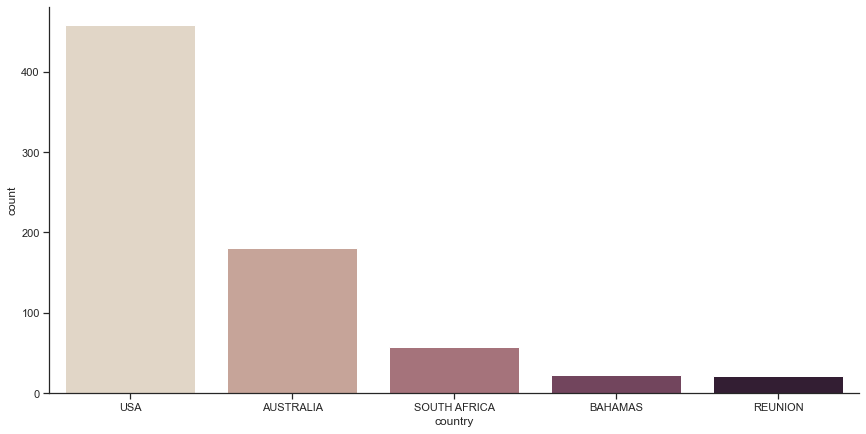

In [191]:
#Ranking de ataques por país de 2008 a 2018
sns.catplot(x='country', kind='count',height=6,
    aspect=2, palette='ch:.25', data=dftop5)


In [192]:
dftop5.columns

Index(['case_number', 'date', 'type', 'country', 'area', 'location',
       'activity', 'sex', 'age', 'injury', 'fatal_(y/n)', 'new_year'],
      dtype='object')

In [197]:
dftop5['age'].describe()

count    742.000000
mean      30.487871
std       16.135367
min        3.000000
25%       17.000000
50%       28.000000
75%       42.000000
max       86.000000
Name: age, dtype: float64

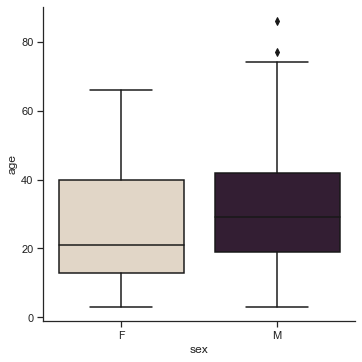

In [200]:
#Distribuição sexo e idade
sns.catplot(x='sex', y='age', kind='box', data=dftop5, palette='ch:.25')

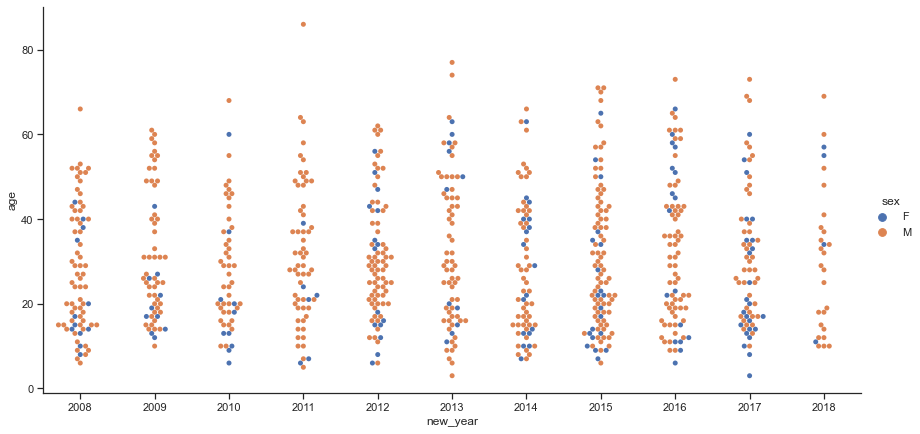

In [205]:
#Distribuição dos ataques por ano, sexo e idade
sns.catplot(x='new_year', y='age', hue='sex', kind="swarm", data=dftop5, height=6,
    aspect=2)

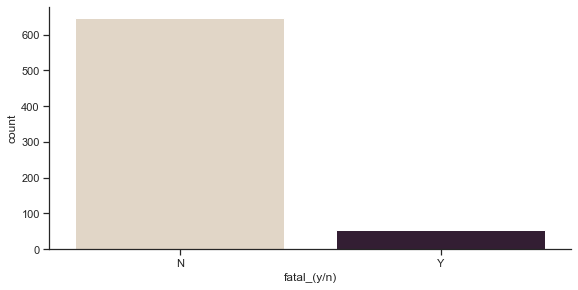

In [207]:
sns.catplot(x='fatal_(y/n)', kind='count',height=4,
    aspect=2, palette='ch:.25', data=dftop5)



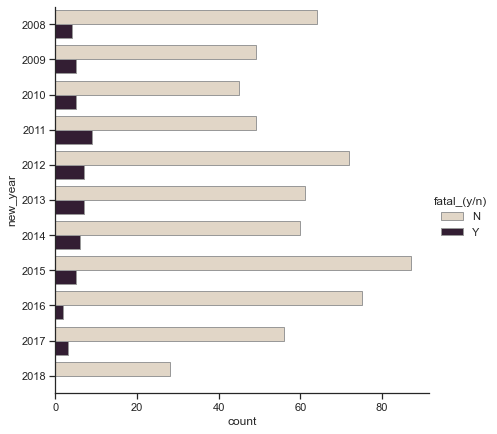

In [212]:
#casos fatais ao longo dos anos
sns.catplot(y='new_year', hue='fatal_(y/n)', kind='count',
            palette='ch:.25', edgecolor='.6',
            data=dftop5, height=6)

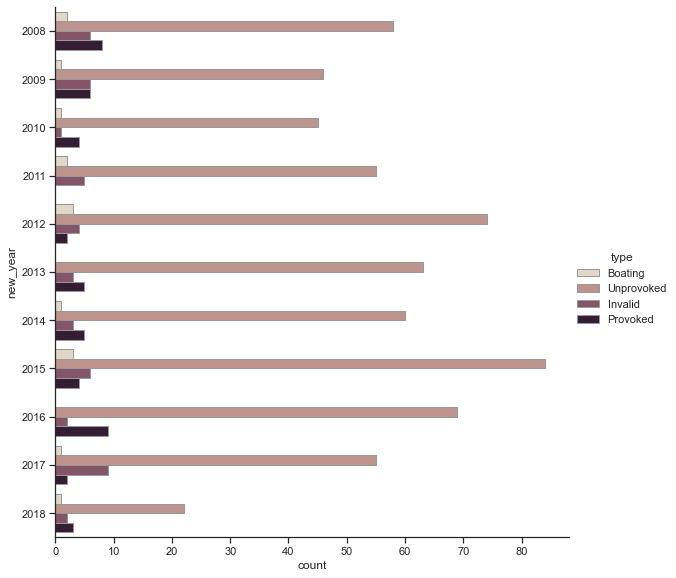

In [214]:
sns.catplot(y='new_year', hue='type', kind='count',
            palette='ch:.25', edgecolor='.6',
            data=dftop5, height=8)

In [217]:
dfactivity = dftop5[(dftop5['activity']=='Surfing')
                    |(dftop5['activity']=='Swimming')
                    |(dftop5['activity']=='Wading')
                    |(dftop5['activity']=='Spearfishing')
                    |(dftop5['activity']=='Snorkeling')
                    |(dftop5['activity']=='Fishing')
                    |(dftop5['activity']=='Diving')
                    |(dftop5['activity']=='Kayaking')
                    |(dftop5['activity']=='Scuba Diving')
                    |(dftop5['activity']=='Surf skiing')]
                  
                    
               

<AxesSubplot:xlabel='activity', ylabel='count'>

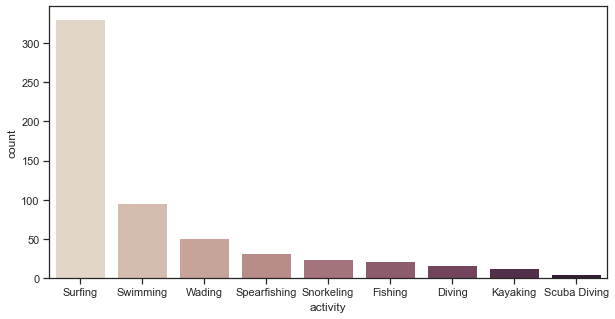

In [223]:
#sns.catplot(x='activity', kind='count',height=6,
 #   aspect=2, palette='ch:.25', data=dfactivity)

sns.countplot(x = 'activity', palette='ch:.25',
              data = dfactivity,
              order = dfactivity['activity'].value_counts().index)